# Exploratory notebook for tensorflow spoken work classification

## Loading .wav files, taking FFT, plotting as an image, cropping down

In [2]:
from scipy.io import wavfile
from scipy import signal

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


## First, find all of the filenames of training audio files, put into dictionary by word

In [3]:
filesdict = {}

words = ['yes',
         'no',
         'up',
         'down',
         'left',
         'right',
         'on',
         'off',
         'stop',
         'go']

f = lambda w, x: os.path.join('train/audio', w, x)
for word in words:
    f = lambda x: os.path.join('train/audio', word, x)
    files = list(map(f, os.listdir(os.path.join('train/audio', word))))
    filesdict[word] = files

## Now, a first run at taking a spectrogram

#### Values may need to be optimized - assumes a max length of 1 second, pads a the end with silence if shorter

In [19]:
def make_spectrogram(filename):
    spec = signal.spectrogram(wavfile.read(filename)[1], fs=16000, nperseg=512, noverlap=256)[2][:150, :]
    spec = spec[::-1, :]
    if spec.shape[1] < 61:
        spec = np.append(spec, np.zeros((150, 61 - spec.shape[1])), axis=1)
        
    if spec.shape[1] > 61:
        print(spec.shape[1])
        
    return spec

## Let's plot some of them

### Pay no attention to the axis labels, x axis should go from 0 to 1 second, y axis from 0 Hz to 4656.25 Hz. This also (on mac) plays the file
### It's not a nice round number, I know

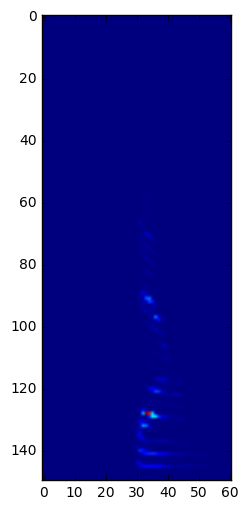

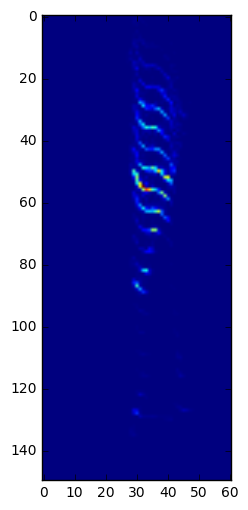

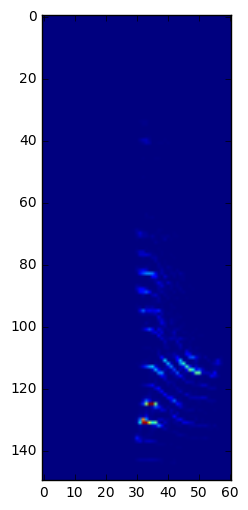

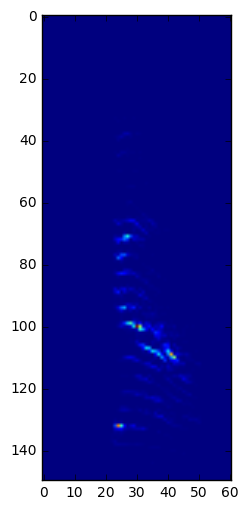

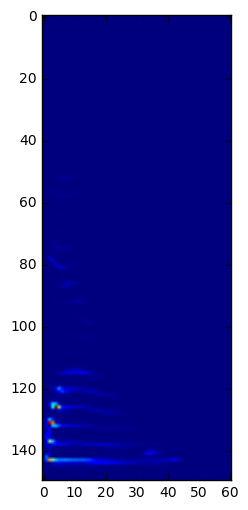

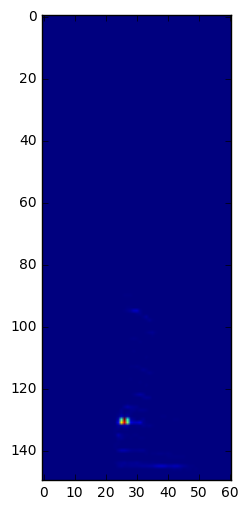

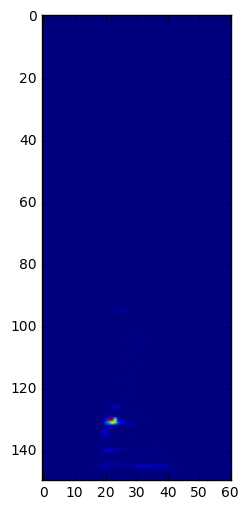

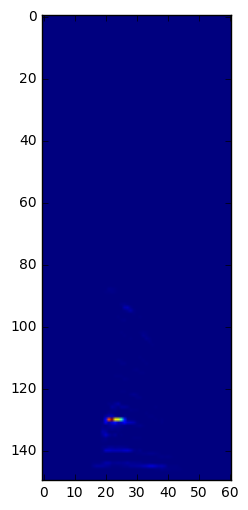

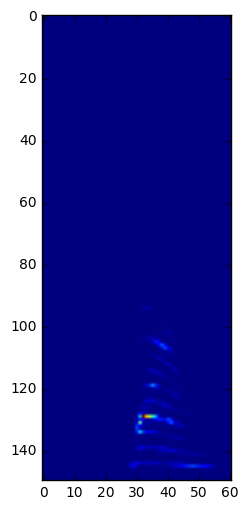

In [22]:
w = 'down'

for i in range(9):
    plt.imshow(make_spectrogram(filesdict[w][i]), interpolation=None)
    plt.show()
    os.system('afplay ' + filesdict[w][i])